In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

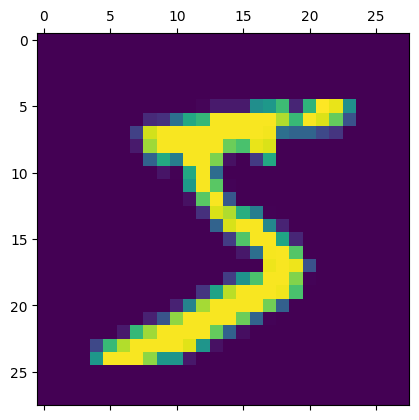

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [13]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.4855 - accuracy: 0.8425
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1242 - accuracy: 0.8796
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7671 - accuracy: 0.8827
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5902 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2880 - accuracy: 0.8878


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 6.1330 - accuracy: 0.8813


[6.133016586303711, 0.8812999725341797]

In [21]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([5.3323862e-35, 0.0000000e+00, 1.9518437e-36, 1.0000000e+00,
       0.0000000e+00, 9.5365620e-18, 0.0000000e+00, 1.0000000e+00,
       9.6375144e-01, 1.0000000e+00], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

3

In [23]:
np.argmax(y_predicted[1])

0

In [25]:
y_predicted_labels=[]
for i in y_predicted:
    y_predicted_labels.append(np.argmax(i))

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    2,    1,    1,    0,    0,    0,    0,    0],
       [   1, 1129,    3,    0,    0,    2,    0,    0,    0,    0],
       [ 386,  284,  351,    6,    3,    0,    2,    0,    0,    0],
       [ 208,   87,  456,  259,    0,    0,    0,    0,    0,    0],
       [ 129,   45,  158,  228,  422,    0,    0,    0,    0,    0],
       [ 264,   36,  175,  261,   76,   77,    1,    0,    2,    0],
       [ 267,   23,  602,   45,   19,    0,    2,    0,    0,    0],
       [  79,   47,  180,  675,   25,    4,    0,   18,    0,    0],
       [  79,  199,  499,  104,   44,   25,    1,    1,   21,    1],
       [  50,   41,  128,  545,  241,    0,    0,    4,    0,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

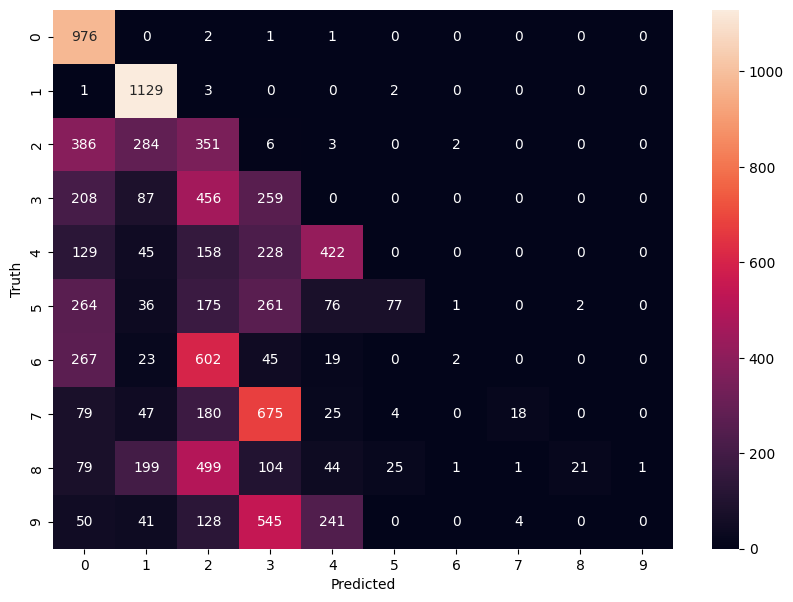

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')